<a href="https://colab.research.google.com/github/wonjae124/Capston/blob/main/label_encoding_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 누락된 데이터 처리



*   pandas는 NaN을 실수값으로 처리
*   파이썬의 내장 자료형 Na있음(Not available)




1.   isnull, 누락 되거나 Na인 값을 boolean 으로 반환



In [86]:
import numpy as np
import pandas as pd

string_data = pd.Series(['aardvark','artichoke',np.nan,'avocado'])

string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [87]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [88]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool





#2.  dropna, 누락 된 데이터가 있는 축을 제외

```
 데이터와 색인값만 들어 있는 Series를 반환
Dataframe에서는 NA값이 하나라도 있는 로우(default값임)는 제외해버린다.

단, how='all' 넣을시 모든 column값이 NA인 row만 제외
```


In [89]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])

data1 = data.dropna()

data1

0    1.0
2    3.5
4    7.0
dtype: float64

In [90]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [91]:
data = pd.DataFrame([[1., 6.5, 3.],[1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


* 열에서 NA를 알아차리면 열을 삭제하는 경우

In [92]:
data2 = data.dropna(axis=1)
data2

""
0
1
2
3


In [93]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [94]:
how_all = data.dropna(how='all')
how_all

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [95]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [96]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [97]:
df = pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,-0.243908,-0.457844,-3.006340
1,0.095669,-1.462438,0.987225
2,-0.310726,1.464171,1.262492
3,0.341479,-0.566874,1.050399
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


In [98]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

df

,0,1,2
0,-0.243908,NaN,NaN
1,0.095669,NaN,NaN
2,-0.310726,NaN,1.262492
3,0.341479,NaN,1.050399
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


In [99]:
df.dropna()

,0,1,2
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


In [100]:
df.dropna(thresh=2)

,0,1,2
2,-0.310726,NaN,1.262492
3,0.341479,NaN,1.050399
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


#3. 결측치 채우기
fillna(메서드)함수로 NaN을 메서드로 채워준다.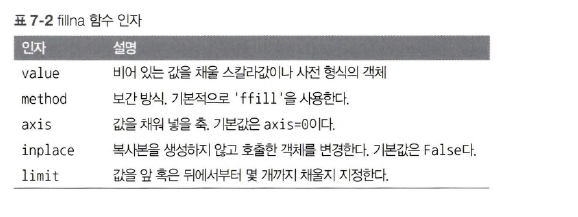

In [101]:
df

,0,1,2
0,-0.243908,NaN,NaN
1,0.095669,NaN,NaN
2,-0.310726,NaN,1.262492
3,0.341479,NaN,1.050399
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


In [104]:
df.fillna(0)

,0,1,2
0,-0.243908,0.000000,0.000000
1,0.095669,0.000000,0.000000
2,-0.310726,0.000000,1.262492
3,0.341479,0.000000,1.050399
4,0.198585,0.234309,0.322440
5,2.051854,0.003215,-0.109274
6,-1.190198,-0.540709,-0.357165


In [83]:
df.fillna({1:0.5, 2:0}) #first column(dict)의 NaN값은 0.5로 채우고 2nd column은 0으로 채운다.

,0,1,2
0,0.485232,0.500000,0.000000
1,0.181471,0.500000,0.000000
2,0.627600,0.500000,0.809038
3,1.737130,0.500000,0.130540
4,-0.245218,-0.405023,-0.290495
5,1.649251,-0.180541,-0.732441
6,0.706818,1.681655,-1.004759


In [85]:
_ = df.fillna(0, inplace = True) #inplace=True는 원본데이터에 영향을 미칠지 정하는 것임
df

,0,1,2
0,0.485232,0.000000,0.000000
1,0.181471,0.000000,0.000000
2,0.627600,0.000000,0.809038
3,1.737130,0.000000,0.130540
4,-0.245218,-0.405023,-0.290495
5,1.649251,-0.180541,-0.732441
6,0.706818,1.681655,-1.004759


In [105]:
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:,1] = NA
df.iloc[4:,2] = NA
df

,0,1,2
0,-1.378931,0.919412,0.482480
1,-0.422283,1.088517,0.067639
2,-0.034927,NaN,-0.407068
3,0.927834,NaN,-0.442835
4,0.712128,NaN,NaN
5,1.954410,NaN,NaN


In [106]:
df.fillna(method='ffill') #결측치 등장하기 이전의 값으로 모두 보간한다.

,0,1,2
0,-1.378931,0.919412,0.482480
1,-0.422283,1.088517,0.067639
2,-0.034927,1.088517,-0.407068
3,0.927834,1.088517,-0.442835
4,0.712128,1.088517,-0.442835
5,1.954410,1.088517,-0.442835


In [107]:
df.fillna(method='ffill',limit=2) #2개까지만 채워준다.

,0,1,2
0,-1.378931,0.919412,0.482480
1,-0.422283,1.088517,0.067639
2,-0.034927,1.088517,-0.407068
3,0.927834,1.088517,-0.442835
4,0.712128,NaN,-0.442835
5,1.954410,NaN,-0.442835


#Pandas 데이터 프레임 접근법

* loc. 데이터 프레임에 label이나 boolean 접근
location의 약자로 인간이 읽을 수 있는 label값으로 데이터 접근

* iloc. 데이터 프레임에 컴퓨터가 읽을 수 있는 indexing 값으로 접근

In [45]:
df = pd.DataFrame({
    "bid_id":[1,2,3],
    "bidder_id":["Gadi","Conda","Lion"],
    "city":["Seoul","LA","Sydney"],
    "item":["Tv","jewerly","book"]}).set_index("bid_id")
df

,bidder_id,city,item
bid_id,,,
1,Gadi,Seoul,Tv
2,Conda,LA,jewerly
3,Lion,Sydney,book


In [46]:
# 첫 번째 row에 접근
df.iloc[0]

bidder_id     Gadi
city         Seoul
item            Tv
Name: 1, dtype: object

In [47]:
# 두 번째 row에 접근
df.iloc[1]

bidder_id      Conda
city              LA
item         jewerly
Name: 2, dtype: object

In [48]:
# 마지막 row
df.iloc[2]

bidder_id      Lion
city         Sydney
item           book
Name: 3, dtype: object

In [50]:
# 첫 번째 column
df.iloc[:,0]

bid_id
1     Gadi
2    Conda
3     Lion
Name: bidder_id, dtype: object

In [51]:
# 두 번째 column
df.iloc[:,1]


bid_id
1     Seoul
2        LA
3    Sydney
Name: city, dtype: object

In [53]:
# 세 번째 column
df.iloc[:,2]

bid_id
1         Tv
2    jewerly
3       book
Name: item, dtype: object

In [57]:
# 레이블이 1인 
df.loc[1]

bidder_id     Gadi
city         Seoul
item            Tv
Name: 1, dtype: object

In [58]:
df.loc[:,"city"]

bid_id
1     Seoul
2        LA
3    Sydney
Name: city, dtype: object